In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Titanic Dataset

In [4]:
dataset=pd.read_csv("./titanic.csv")

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data Cleaning (Remove Unnecessary information)

In [7]:
column_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]
dataset=dataset.drop(column_to_drop,axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
def Alias_sex(sex):
    if sex.lower().startswith("m"):
        return 0
    elif sex.lower().startswith("f"):
        return 1
    else :
        return sex

dataset["Sex"]=dataset["Sex"].apply(Alias_sex)

In [9]:
#along row,if any na come drop the row if axis=1 then if any na come in column 
 #it drop all column
dataset.dropna?

In [10]:
dataset=dataset.dropna(axis=0,how="any") 
dataset=dataset.reset_index(drop=True)
dataset.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


### Correlation B/w Features of titanic Dataset

In [11]:
cor_matrix=dataset.corr() #function of pandas lib
cor_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


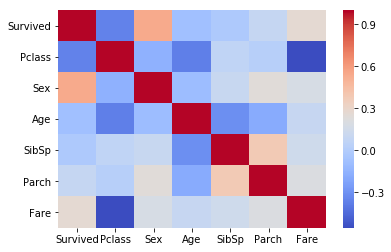

In [12]:
plt.figure()
sns.heatmap(cor_matrix,cmap="coolwarm")
plt.show()

#### Remove the label From the dataset

In [13]:
X=dataset[[each for each in dataset.columns if each!="Survived"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null int64
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


#### Label of Dataset

In [14]:
y=pd.DataFrame(dataset["Survived"],columns=["Survived"])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Implementation of Decision Tree

In [270]:
class DecisionTree:
    label_col=None
    def __init__(self,depth=1,maxdepth=10):
        self.left_tree=None
        self.right_tree=None
        self.tree_data=None
        self.root_col=None
        self.root_val=None
        self.depth=depth
        self.maxdepth=maxdepth
        

    def getbestsplit(self,root):
        information_gain=[]
        for col in root.columns:
            if col==DecisionTree.label_col:
                continue
                
            mean_value1=root[col].mean()
            feature_col1=col
            left_data,right_data=self.splitdata(root,mean_value1,feature_col1)
            information_gain.append((DecisionTree.information_gain(root,left_data,right_data),mean_value1,feature_col1))
            
        information_gain=sorted(information_gain,key=lambda x:x[0],reverse=True)[0]
        
        return information_gain
    
    def splitdata(self,root,mean_value,feature_col):
        right,left=list(),list()
        
        for x in range(root.shape[0]):
            row=root.iloc[x]
            if row[feature_col]<=mean_value:
                left.append(row)
                
            else :
                right.append(row)
                        
        #Now create the dataframe and reset index
        
        left_data=pd.DataFrame(left,columns=root.columns).reset_index(drop=True)
        right_data=pd.DataFrame(right,columns=root.columns).reset_index(drop=True)
    
        return (left_data,right_data)
            
    def information_gain(root,left,right):
        l=left.shape[0]/root.shape[0]
        r=1-l
        
        if not(l or r):
            return -np.inf
        
        gain=DecisionTree.entropy(root)-(DecisionTree.entropy(left)*l+DecisionTree.entropy(right)*r)
        
        return gain
    
    def entropy(system):
        label,counts=np.unique(system[DecisionTree.label_col].values,return_counts=True)
        ent=0
        for i,l in enumerate(label):
            p=counts[i]/system.shape[0]
            ent+=-p*np.log2(p)
            
        return ent
        
    def createtree(self,root):
        self.tree_data=root
        #colum and value at which our tree split and create the new tree
        gain,val,col=self.getbestsplit(root)
        
        self.root_col=col
        self.root_val=val
        
        left_data,right_data=self.splitdata(root,val,col)
        
        if left_data.shape[0]==0 or right_data.shape[0]==0:
            return
        if self.depth>=self.maxdepth:
            return
        
    #Here we make a new tree and act as node of tree
        self.left_tree=DecisionTree(depth=self.depth+1,maxdepth=self.maxdepth)
        self.right_tree=DecisionTree(depth=self.depth+1,maxdepth=self.maxdepth)
    
    #Now we create tree of left and right until it hit base case ie depth=maxdepth
        self.left_tree.createtree(left_data)
        self.right_tree.createtree(right_data)
    
    def isleafnode(self):
        return  not(self.right_tree and self.left_tree)
    
    def fit(self,data,label_column1):
        self.tree_data=data
        DecisionTree.label_col=label_column1
        self.createtree(data)
        
    def predict(self,test): #valid only for binary classification
        if self.isleafnode():
            #Decide which class is our answer of test
            survive=self.tree_data[DecisionTree.label_col].sum()
            death=self.tree_data.shape[0]-survive
            
            return (1 if survive>=death else 0)
            
        else:
            if test[self.root_col]<=self.root_val:
                return self.left_tree.predict(test)
                
            else:
                return self.right_tree.predict(test)
            
    
    def score(self,x_test,y_test,data):
        pred=[]
        for x in data.index[:data.shape[0]]:
            pred.append(self.predict(data.loc[x]))
            
        pred=np.array(pred)
        y_test=y_test["Survived"].values
        return(pred==y_test).sum()/y_test.shape[0]
    
    def Predictlist(self,x_test,y_test,data):
        pred=[]
        for x in data.index[:data.shape[0]]:
            pred.append(self.predict(data.loc[x]))
            
        pred=np.array(pred)
                
        return pred
        
    def print(self):
        print("---------Depth of Tree --> {}--------------".format(self.depth))
        str1=""
        if  self.left_tree:
            str1+=str(self.left_tree.root_col)+" , "+str(self.left_tree.root_val)+" --> "
        else:
            str1+=" END --> "
            
        str1+=str(self.root_col)+" , "+str(self.root_val)
        
        if self.right_tree:
            str1+=" <-- "+str(self.right_tree.root_col)+" , "+str(self.right_tree.root_val)
        else :
            str1+=" <-- END "
            
        print(str1,sep="\n")
        if self.left_tree:
            self.left_tree.print()
            
        if self.right_tree:
            self.right_tree.print()
            
    def score1(self, labels, y_test):
        return (labels == y_test).sum() / y_test.shape[0]
    
    

### Spliting Dataset Using sklearn

In [250]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [251]:
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [260]:
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [261]:
y_train.head(3)

,Survived
0,0
1,1
2,1


In [262]:
x_train,y_train=x_train.reset_index(drop=True),y_train.reset_index(drop=True)
x_test,y_test=x_test.reset_index(drop=True),y_test.reset_index(drop=True)

In [263]:
y_train.head(3)

,Survived
0,0
1,1
2,1


### Training Our Dataset Using Decision Tree

In [271]:
Titanic=DecisionTree(maxdepth=6)
split=int(0.8*dataset.shape[0])
print(dataset[:split].shape)
Titanic.fit(dataset[:split],"Survived")

(571, 7)


In [272]:
Titanic.root_col,Titanic.root_val

('Sex', 0.36777583187390545)

In [273]:
Titanic.print()

---------Depth of Tree --> 1--------------
Fare , 28.257881994459833 --> Sex , 0.36777583187390545 <-- Pclass , 2.080952380952381
---------Depth of Tree --> 2--------------
Fare , 12.418069696969695 --> Fare , 28.257881994459833 <-- SibSp , 1.0721649484536082
---------Depth of Tree --> 3--------------
Parch , 0.02976190476190476 --> Fare , 12.418069696969695 <-- Parch , 0.3229166666666667
---------Depth of Tree --> 4--------------
SibSp , 0.08588957055214724 --> Parch , 0.02976190476190476 <-- Pclass , 2.8
---------Depth of Tree --> 5--------------
Fare , 7.93571447368421 --> SibSp , 0.08588957055214724 <-- SibSp , 1.2727272727272727
---------Depth of Tree --> 6--------------
 END --> Fare , 7.93571447368421 <-- END 
---------Depth of Tree --> 6--------------
 END --> SibSp , 1.2727272727272727 <-- END 
---------Depth of Tree --> 5--------------
Pclass , 2.0 --> Pclass , 2.8 <-- Pclass , 3.0
---------Depth of Tree --> 6--------------
 END --> Pclass , 2.0 <-- END 
---------Depth of Tre

In [275]:
Titanic.score(x_test,y_test,dataset[split:])

0.8391608391608392

### Prediction Score

In [268]:

labels = []
testing_data=dataset[split:]
for ix in testing_data.index[:]:
    labels.append(Titanic.predict(testing_data.loc[ix]))
labels=np.array(labels)
labels[:3]

array([0, 1, 0])

In [269]:
actual_labels = y_test['Survived'].values
actual_labels[:10]
Titanic.score1(labels,actual_labels)

0.8391608391608392

## SkLearn Implementation of Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [277]:
DT_titanic=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [278]:
DT_titanic.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [279]:
DT_titanic.score(x_test,y_test)

0.8461538461538461

## Random Forest Implementation

In [280]:
def DatasetCreate(data):
    col_name=[each for each in data.columns if each!="Survived"]
    Rand_Col=np.random.choice(col_name,size=4,replace=False)
    Ndata=data[[col for col in data.columns if col in Rand_Col or col=="Survived"]]
    
    return Ndata.reset_index(drop=True)

In [295]:
def splitdata(data):
    X=data[[each for each in data.columns if each!="Survived"]]
    y=pd.DataFrame(data["Survived"],columns=["Survived"]) 
    x_train1, x_test1 = X[:split], X[split:]
    y_train1, y_test1 = y[:split], y[split:]
    return x_test1.reset_index(drop=True),y_test1.reset_index(drop=True)

In [282]:
splitdata(DatasetCreate(dataset))[0][:5]

,Sex,Age,SibSp,Parch
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


### Concept of Random Selection of column

In [214]:
np.random.choice([1,4,5,55,7],size=3,replace=False) #repalce to get unique output  ==it mean we find random value without replacement of choice value

array([ 5,  7, 55])

In [224]:
# Rand_Col=np.random.choice(x_test.columns,size=5)
col_name=[each for each in dataset.columns if each!="Survived"]
print(col_name)
Rand_Col=np.random.choice(col_name,size=4,replace=False)
print(Rand_Col)
Ndata=dataset[[col for col in dataset.columns if col in Rand_Col or col=="Survived"]]
Ndata.head(3)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex' 'Pclass' 'SibSp' 'Parch']


,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0


In [314]:
n_tree=5
prediction=[]
acc=[]
# print(dataset.shape,split)
for i in range(n_tree):
    newData=DatasetCreate(dataset)
#     print(newData.shape)
    Dt=DecisionTree(maxdepth=5)
    Dt.fit(newData,"Survived")
    test,label=splitdata(newData)
#     print(test.shape,label.shape)
    scr=Dt.score(test,label,newData[split:])
    acc.append(scr)
    print("{} --> {}".format(i,scr))
    prediction.append(Dt.Predictlist(test,label,newData[split:]))
    
prediction=np.array(prediction)
prediction.shape

0 --> 0.7132867132867133
1 --> 0.8321678321678322
2 --> 0.7972027972027972
3 --> 0.7972027972027972
4 --> 0.7622377622377622


(5, 143)

In [315]:
prediction[:2,:12]

array([[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]])

In [316]:
pred=prediction.mean(axis=0)

In [317]:
pred[:12]

array([0. , 1. , 0. , 0.2, 0. , 0.6, 0. , 0.8, 0.2, 0.2, 1. , 0.2])

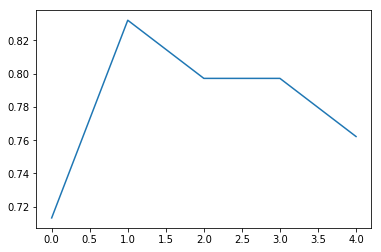

In [318]:
plt.plot(acc)

In [320]:
for p in  range(pred.shape[0]):
    if pred[p]>=0.5:
        pred[p]=1
    else:
        pred[p]=0
pred[:12]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [324]:

final_pred=(pred == y_test["Survived"].values).sum() / y_test.shape[0]

In [325]:
print(final_pred)

0.8181818181818182
